In [7]:
path = "image.jpg"

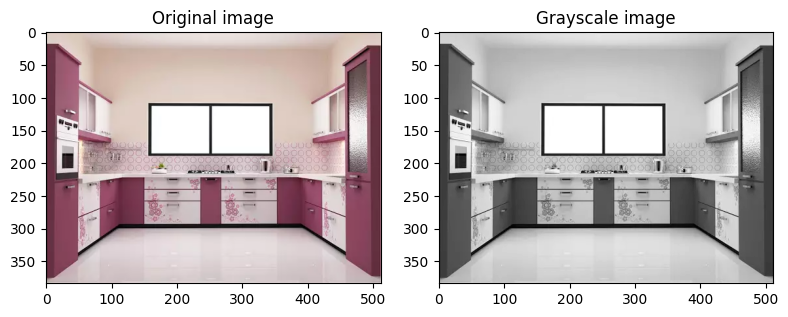

In [8]:
from skimage import io
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage import data
orig_img = io.imread(path)
grayscale_img = rgb2gray(orig_img)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(orig_img)
ax[0].set_title("Original image")
ax[1].imshow(grayscale_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale image")
fig.tight_layout()
plt.show()

In [38]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('image.jpg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)


<class 'numpy.ndarray'>
(384, 512, 3)
<class 'PIL.Image.Image'>
RGB
(512, 384)
(384, 512, 3)


In [56]:
im = data
print(im.shape)

(384, 512, 3)


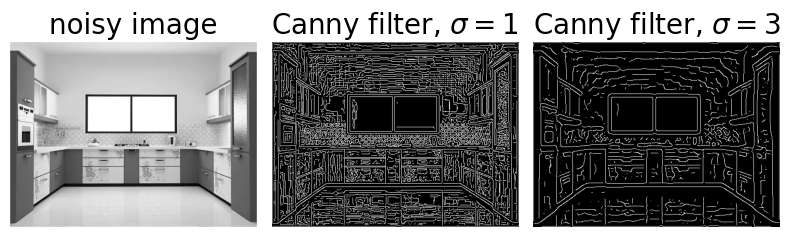

In [60]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
import skimage


# Generate noisy image of a square
#image = np.zeros((128, 128), dtype=float)
#image[32:-32, 32:-32] = 1

#image = ndi.rotate(image, 15, mode='constant')
#image = ndi.gaussian_filter(image, 4)
#image = random_noise(image, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma

image = skimage.io.imread(fname = "image.jpg")
image_grey = np.mean(image , axis=2)
image = image_grey
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [9]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv

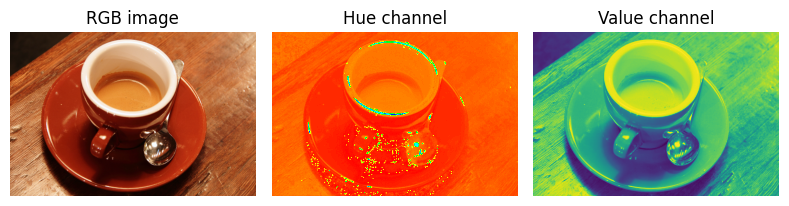

In [10]:
rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

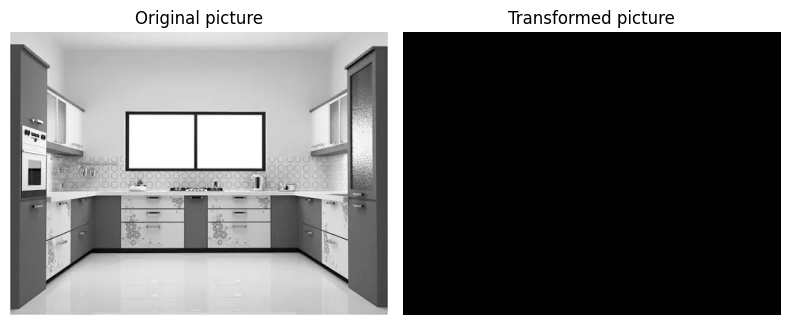

In [61]:
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

# The original image is inverted as the object must be white.
#image = invert(data.horse())

chull = convex_hull_image(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

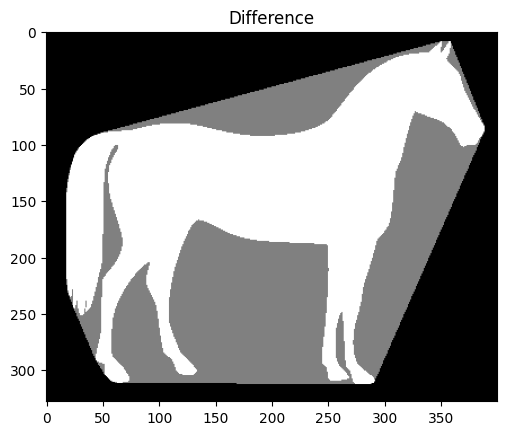

In [12]:
chull_diff = img_as_float(chull.copy())
chull_diff[image] = 2

fig, ax = plt.subplots()
ax.imshow(chull_diff, cmap=plt.cm.gray)
ax.set_title('Difference')
plt.show()

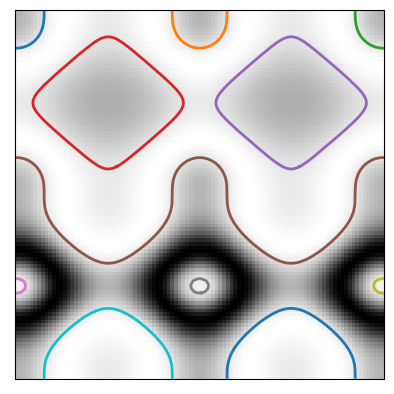

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()